In [136]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [137]:
path1 = 'Datasets/captcha_images_v2/2b827.png'
path2 = 'Datasets/captcha_images_v2/3bx86.png'

In [138]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

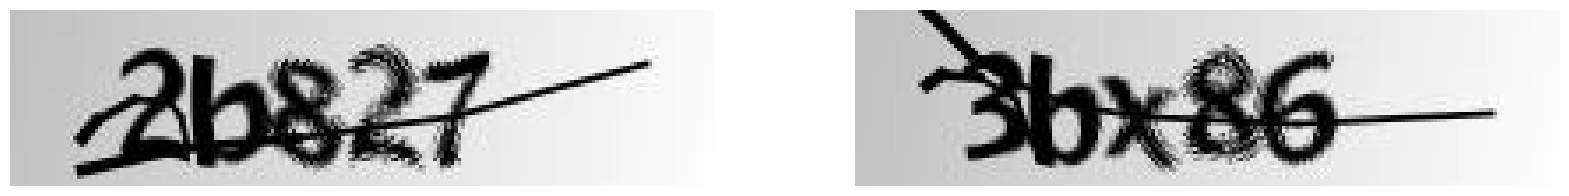

In [139]:
def plot_(img1, img2):
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')  # Pastikan img1 adalah array numpy dengan tipe data yang tepat
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')  # Pastikan img2 adalah array numpy dengan tipe data yang tepat
    plt.axis('off')
    
    plt.show()

# Panggil fungsi plot_() dengan gambar img1 dan img2
plot_(img1, img2)

In [140]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

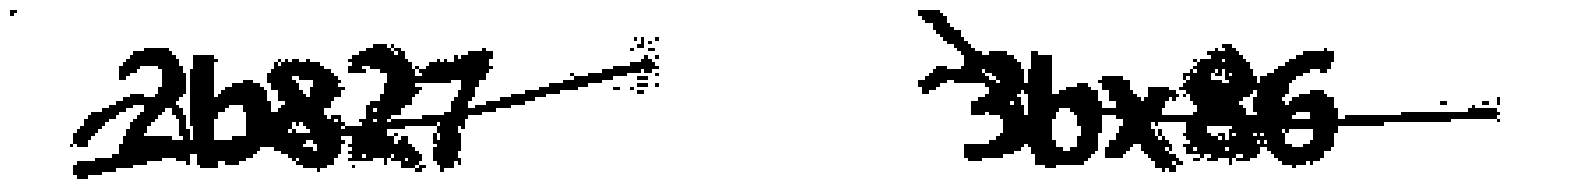

In [141]:
plot_(thresh_img1, thresh_img2)

In [142]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

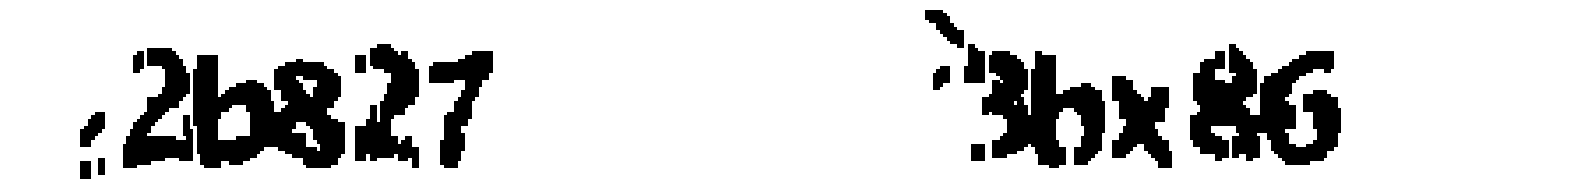

In [143]:
plot_(close_img1, close_img2)

In [144]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

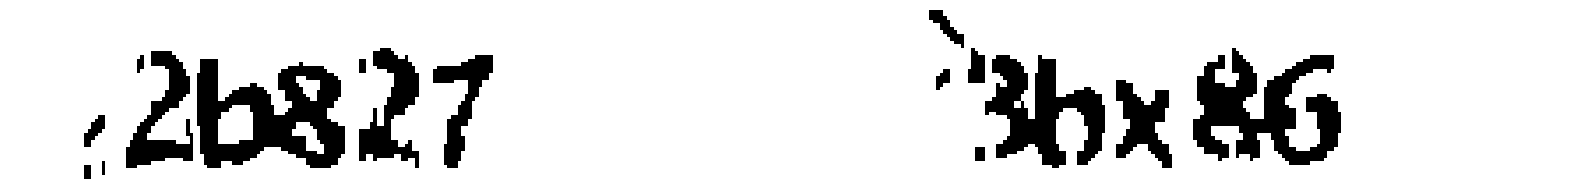

In [145]:
plot_(dilate_img1, dilate_img2)

In [146]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

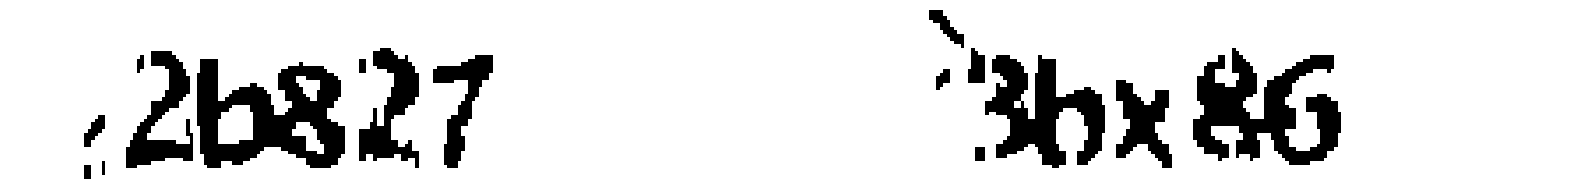

In [147]:
plot_(gauss_img1, gauss_img2)

In [148]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

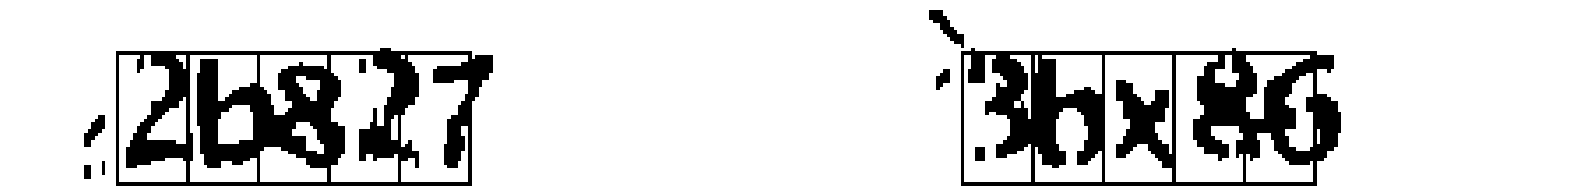

In [149]:
plot_(gauss_img1, gauss_img2)

In [150]:
path = 'Datasets/captcha_images_v2/samples/'

In [151]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [152]:
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, ImageDataGenerator

In [153]:
X = []
y = []

for image in os.listdir(path) :
    
    if image[6:] != 'png' :
        continue
    
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [154]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [155]:
X /= 255.0

[]

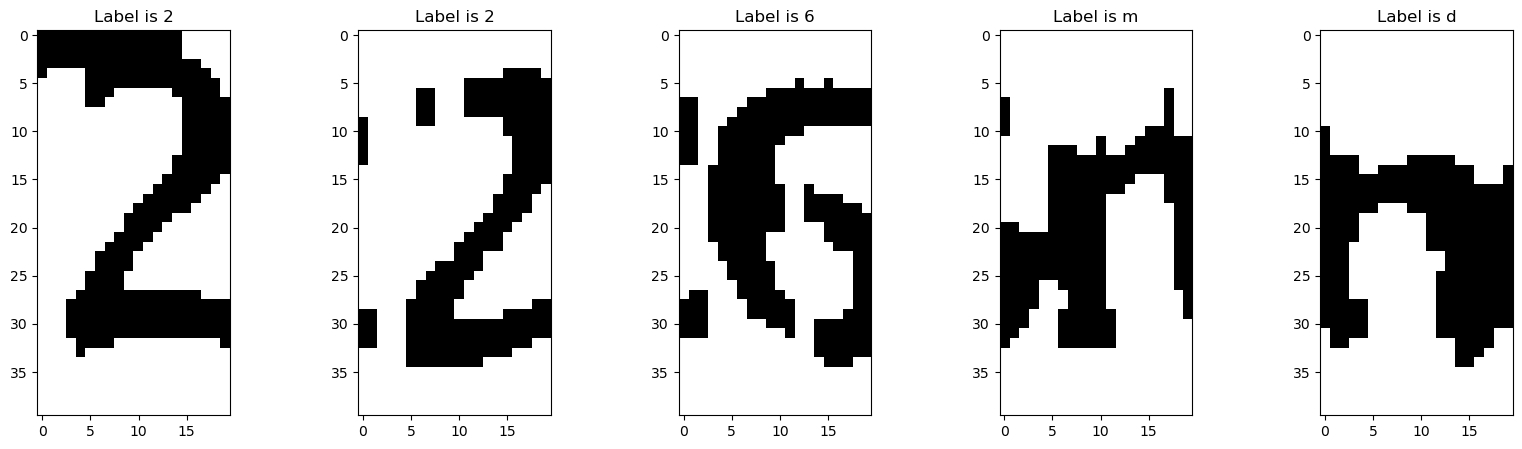

In [156]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [157]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of 3 : 267
Occurance count of 8 : 264
Occurance count of y : 232
Occurance count of p : 253
Occurance count of m : 275
Occurance count of x : 264
Occurance count of b : 240
Occurance count of n : 525
Occurance count of w : 235
Occurance count of 7 : 258
Occurance count of f : 271
Occurance count of 5 : 281
Occurance count of 2 : 265
Occurance count of 6 : 259
Occurance count of d : 259
Occurance count of e : 235
Occurance count of 4 : 284
Occurance count of c : 262
Occurance count of g : 271


In [158]:
 temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

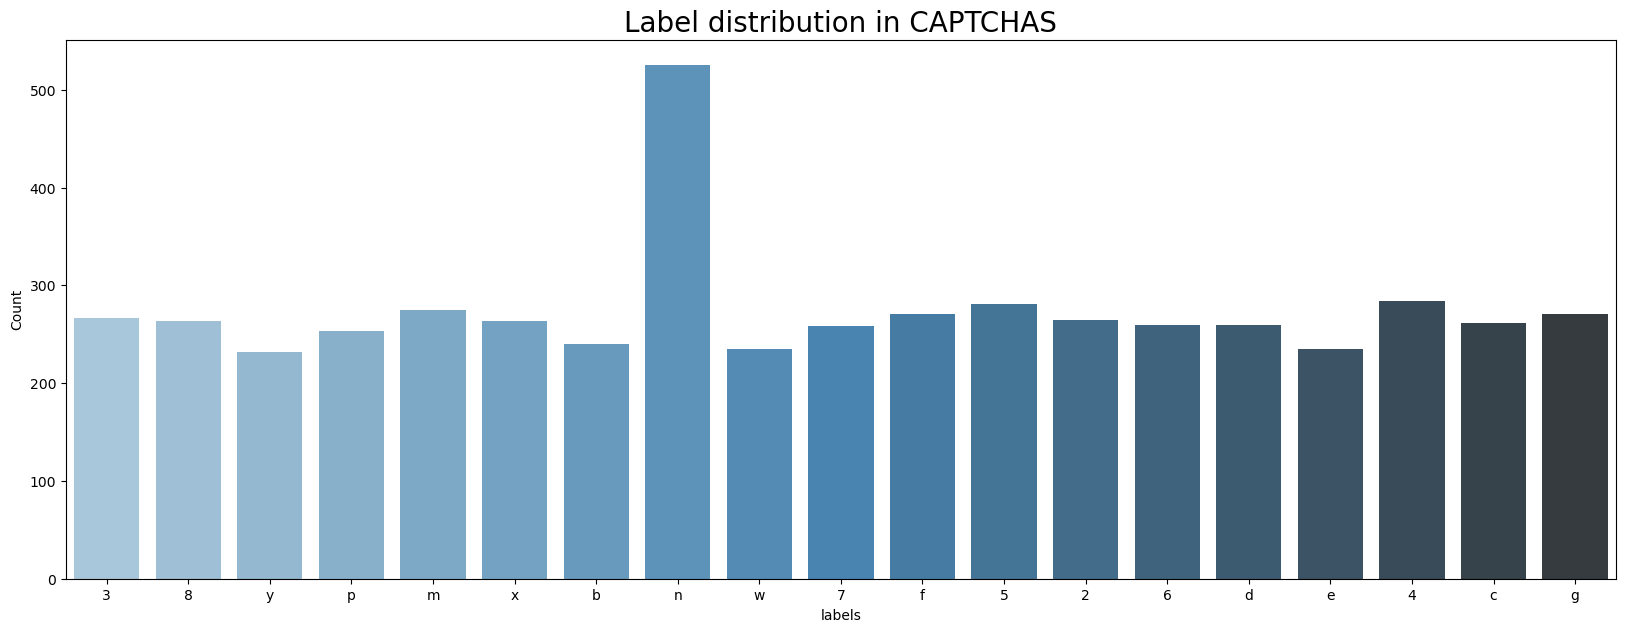

In [159]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

In [160]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse_output = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [161]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : 2
label : 0
Count : 265


In [162]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [163]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [166]:
y_temp = np.argmax(y_test, axis = 1)

In [167]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in test set')

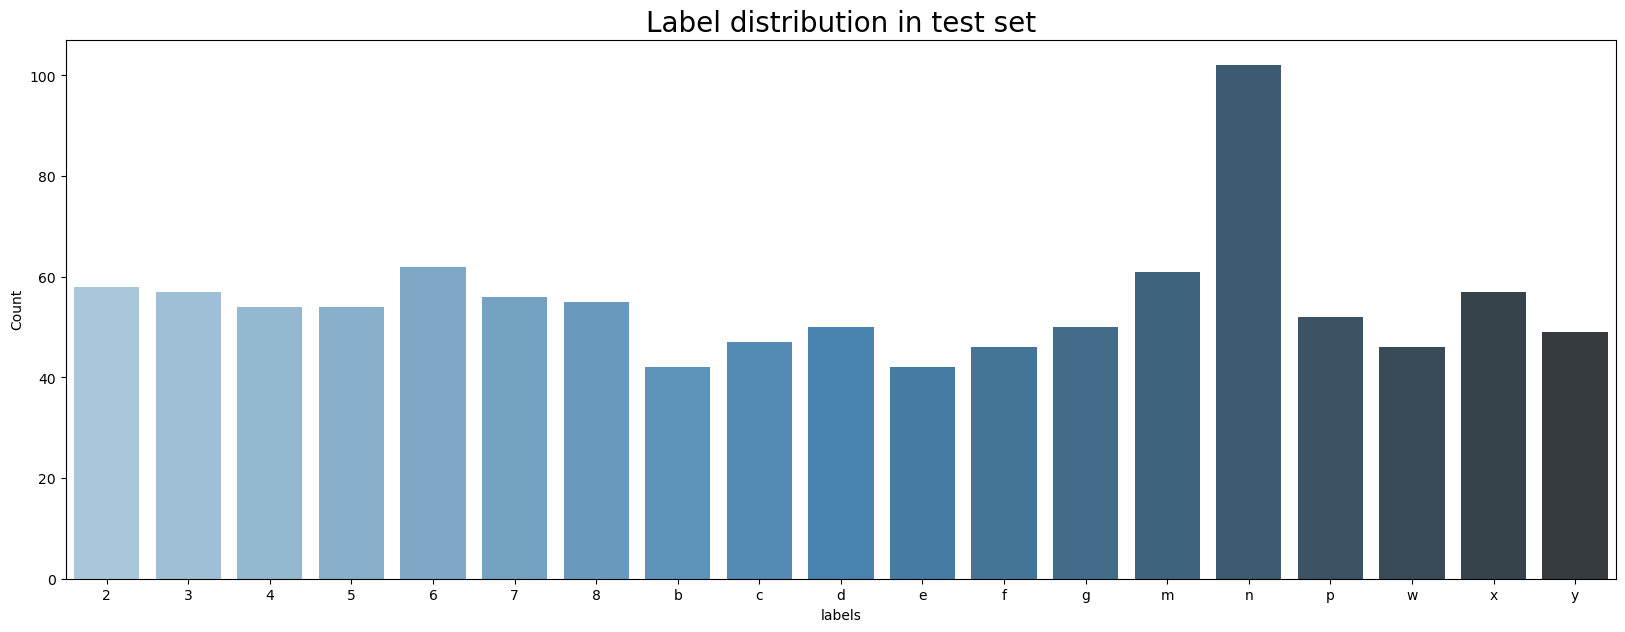

In [168]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

In [169]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [170]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [171]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [172]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

In [173]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [174]:

def cnn(filter1, filter2, filter3, hidden1, hidden2):
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    
    model.add(Conv2D(filter1, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(filter2, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(filter3, (3, 3), activation='relu'))
    model.add(Flatten())
    
    model.add(Dense(hidden1, activation='relu'))
    model.add(Dense(hidden2, activation='relu'))
    
    model.add(Dense(19, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [175]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [176]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [177]:
print(X_train.shape)
print(y_train.shape)

(8037, 800)
(8037, 19)


In [178]:
X_train = np.reshape(X_train, (8037, 40, 20, 1))

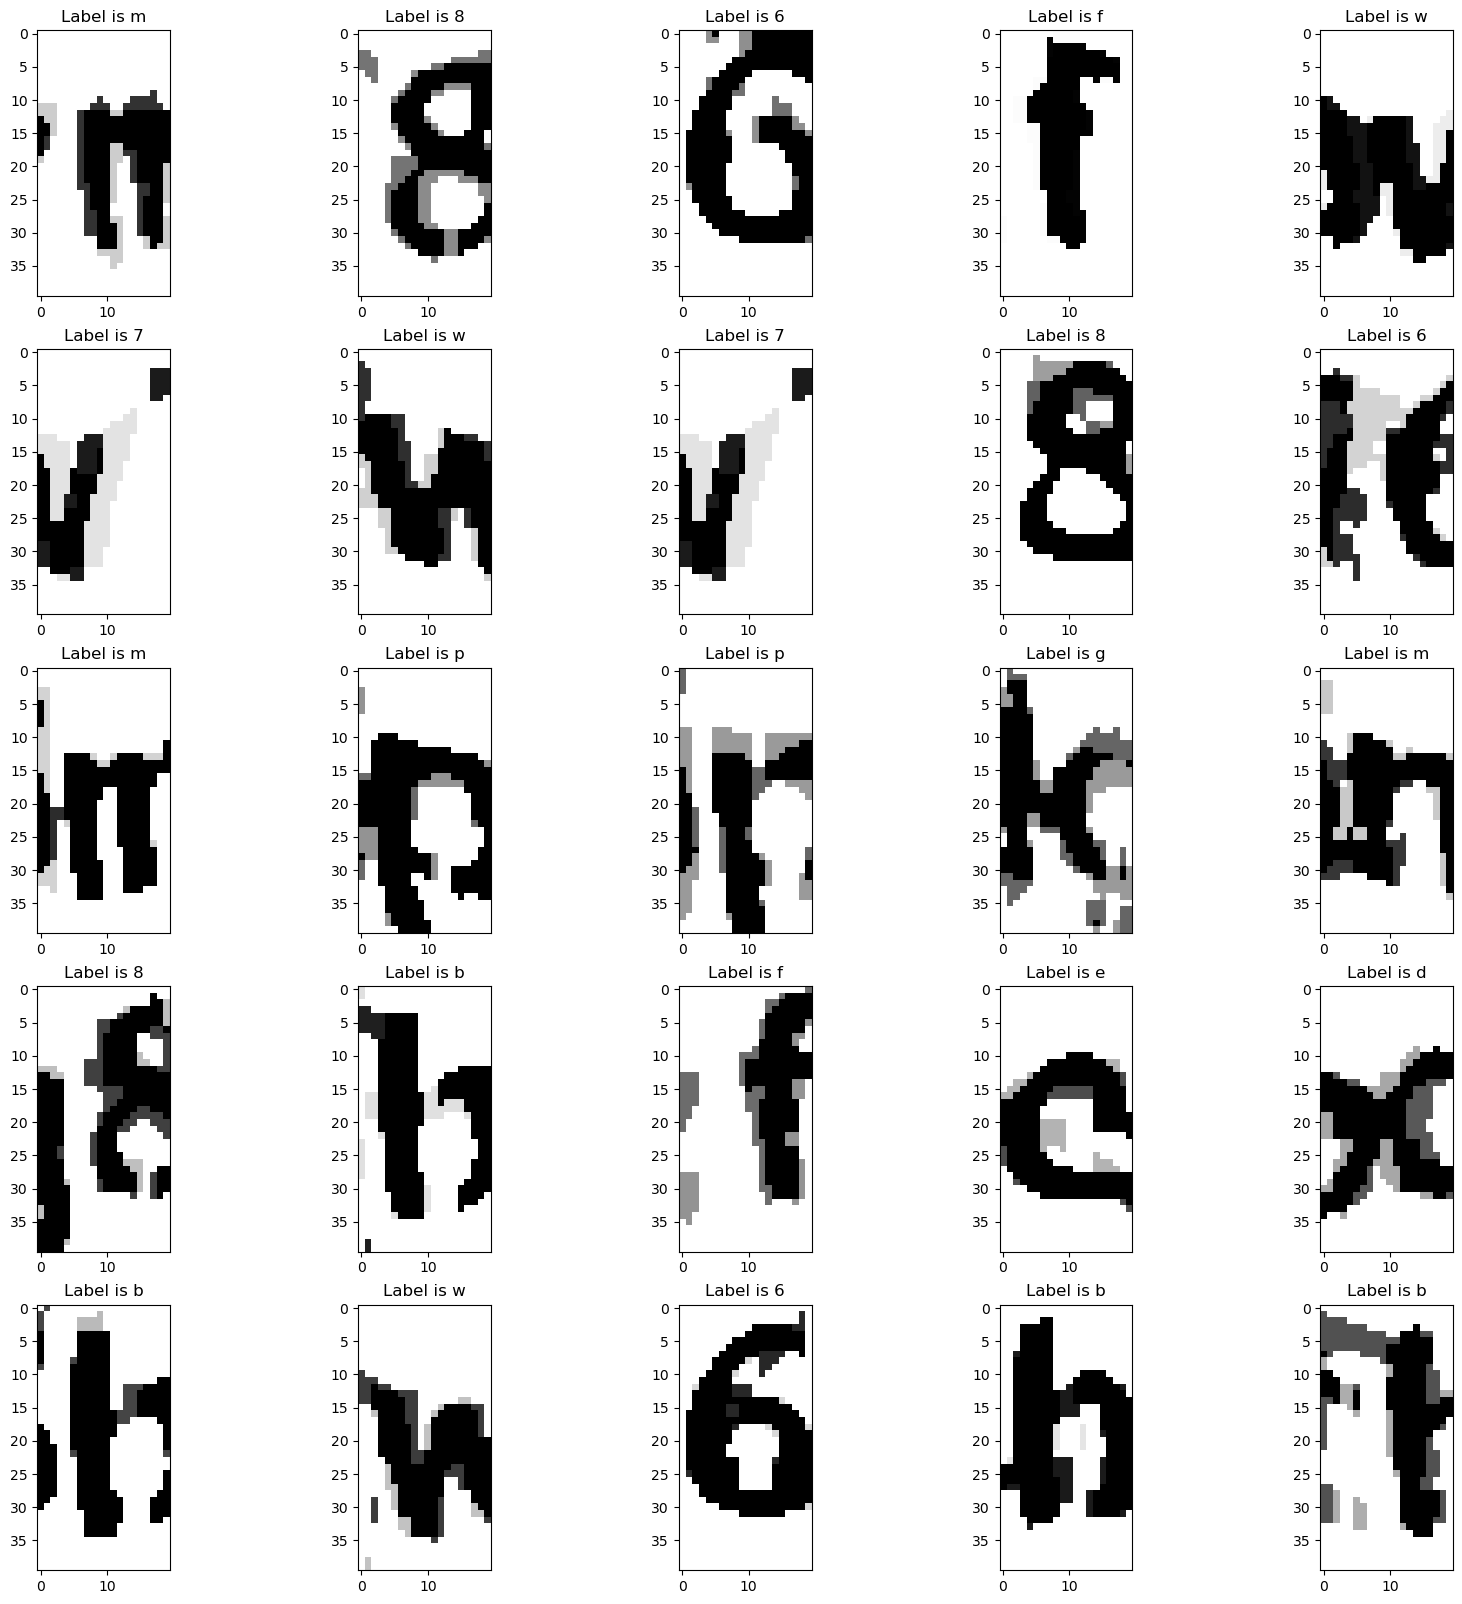

In [179]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

In [180]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [181]:
train_set = traingen.flow(X_train, y_train)

In [182]:
trainX, trainy = train_set.next()

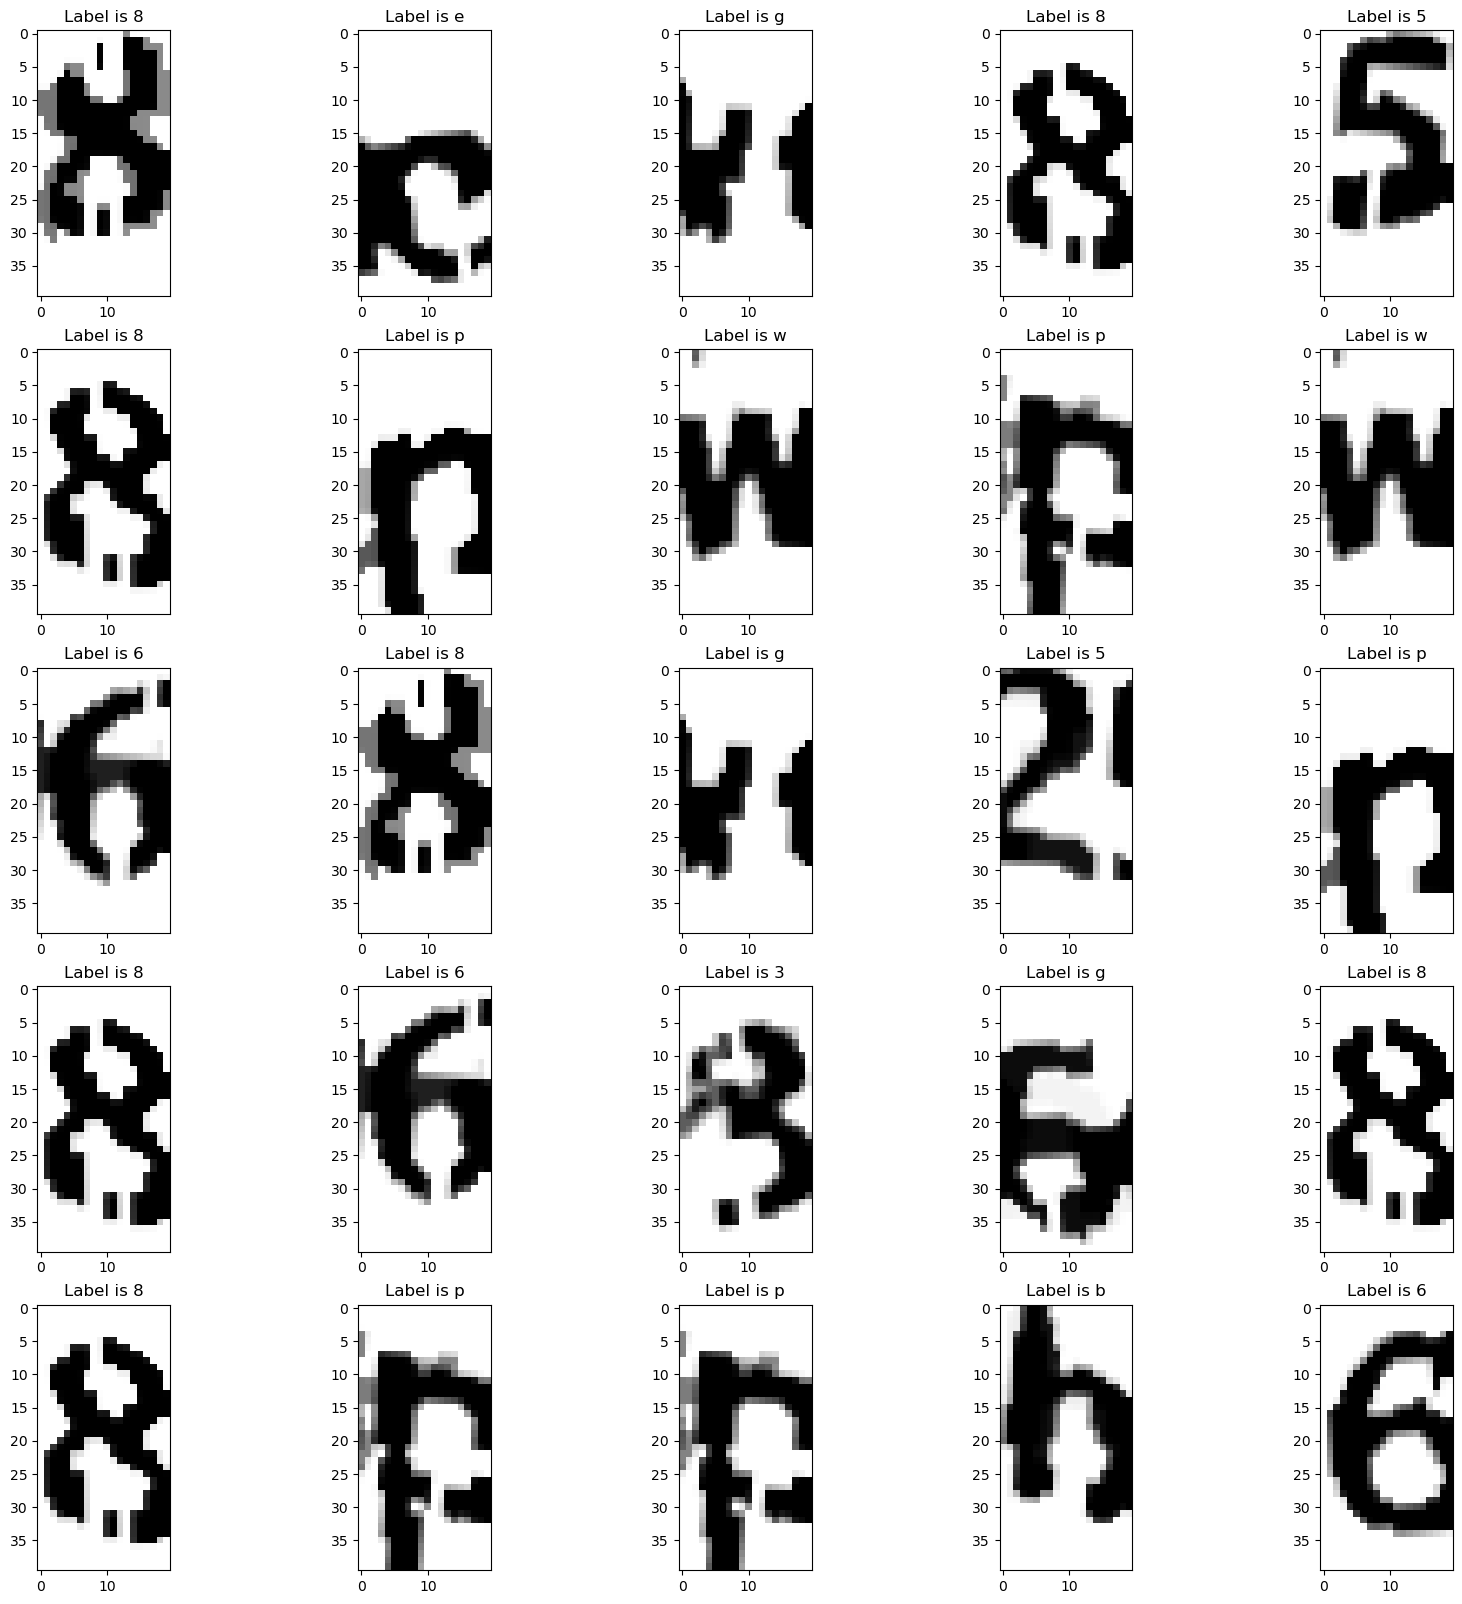

In [183]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

In [184]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 18, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 19, 9, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 7, 32)         36896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 1, 16)          4624      
                                                                 
 flatten_2 (Flatten)         (None, 96)               

In [185]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [186]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [187]:
print(X_train.shape)
print(y_train.shape)

(8037, 40, 20, 1)
(8037, 19)


In [188]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 100, steps_per_epoch = len(X_train)/32, callbacks = [checkp])

Epoch 1/100
251/251 [============================>.] - ETA: 0s - loss: 2.1674 - accuracy: 0.3324
Epoch 1: val_loss improved from inf to 1.43260, saving model to .\result_model.h5
251/251 [==============================] - 11s 31ms/step - loss: 2.1638 - accuracy: 0.3333 - val_loss: 1.4326 - val_accuracy: 0.5635
Epoch 2/100
  1/251 [..............................] - ETA: 18s - loss: 1.7843 - accuracy: 0.5312

C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


252/251 [==============================] - ETA: 0s - loss: 1.2164 - accuracy: 0.6346
Epoch 2: val_loss improved from 1.43260 to 1.02931, saving model to .\result_model.h5
251/251 [==============================] - 8s 31ms/step - loss: 1.2164 - accuracy: 0.6346 - val_loss: 1.0293 - val_accuracy: 0.6827
Epoch 3/100
252/251 [==============================] - ETA: 0s - loss: 0.9942 - accuracy: 0.7052
Epoch 3: val_loss improved from 1.02931 to 1.02415, saving model to .\result_model.h5
251/251 [==============================] - 9s 35ms/step - loss: 0.9942 - accuracy: 0.7052 - val_loss: 1.0241 - val_accuracy: 0.7125
Epoch 4/100
251/251 [============================>.] - ETA: 0s - loss: 0.8507 - accuracy: 0.7553
Epoch 4: val_loss improved from 1.02415 to 0.96698, saving model to .\result_model.h5
251/251 [==============================] - 7s 28ms/step - loss: 0.8512 - accuracy: 0.7553 - val_loss: 0.9670 - val_accuracy: 0.7029
Epoch 5/100
250/251 [============================>.] - ETA: 0s - lo

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

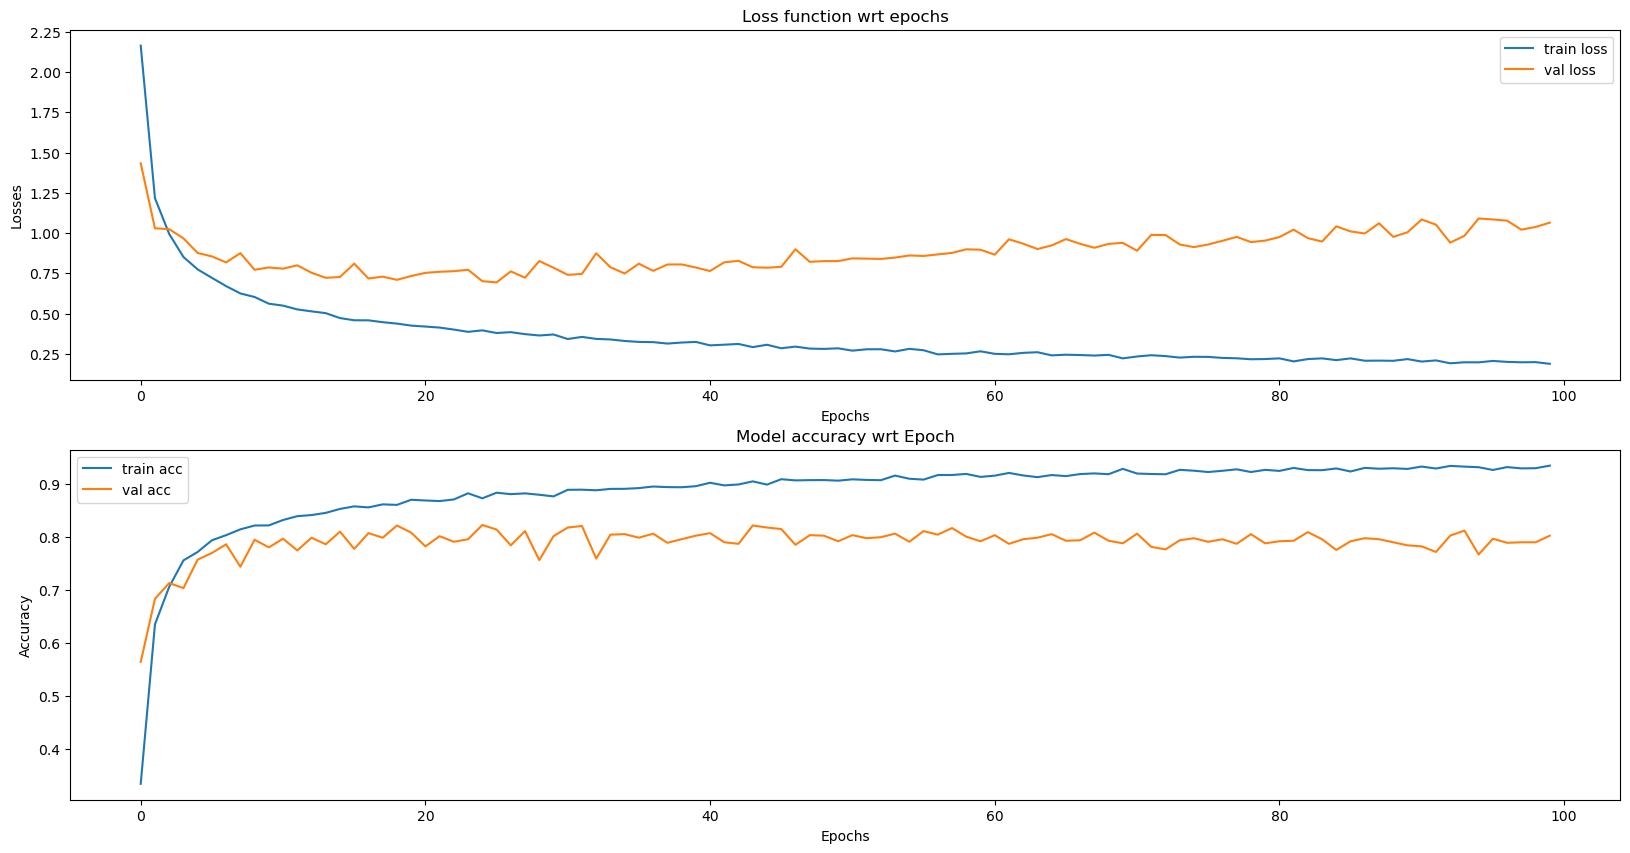

In [189]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [190]:
from keras.models import load_model

In [191]:
model = load_model('./result_model.h5')

In [192]:
pred = model.predict(X_test)

33/33 [==============================] - 1s 11ms/step


In [193]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [194]:
from sklearn.metrics import accuracy_score, classification_report

In [195]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [196]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [197]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.8134615384615385
              precision    recall  f1-score   support

           2       0.95      0.90      0.92        58
           3       0.83      0.93      0.88        57
           4       0.92      0.91      0.92        54
           5       0.82      0.83      0.83        54
           6       0.94      0.79      0.86        62
           7       0.86      0.86      0.86        56
           8       0.94      0.93      0.94        55
           b       0.95      0.98      0.96        42
           c       0.62      0.85      0.71        47
           d       0.80      0.70      0.74        50
           e       0.80      0.79      0.80        42
           f       0.79      0.89      0.84        46
           g       0.77      0.74      0.76        50
           m       0.54      0.52      0.53        61
           n       0.71      0.69      0.70       102
           p       0.86      0.83      0.84        52
           w       0.80      0.80      0.80        

In [198]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

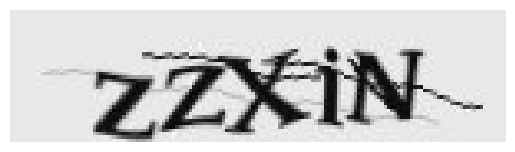

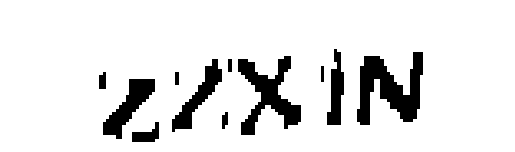

InvalidArgumentError: Graph execution error:

Detected at node sequential_2/dense_6/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Storage\Apk\Environment\Py\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\dimas\AppData\Local\Temp\ipykernel_15532\3218228333.py", line 1, in <module>

  File "C:\Users\dimas\AppData\Local\Temp\ipykernel_15532\3998585411.py", line 26, in get_demo

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [5,64], In[1]: [96,32]
	 [[{{node sequential_2/dense_6/Relu}}]] [Op:__inference_predict_function_157160]

In [206]:
get_demo('Datasets/captcha_images_v2/zzXiN.jpg')

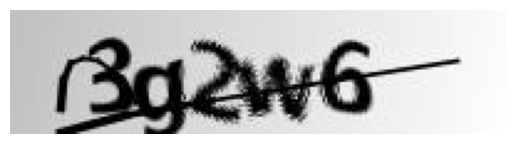

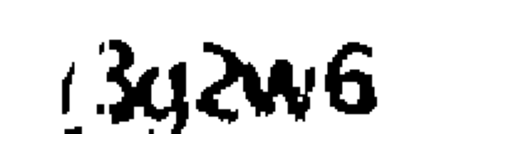

1/1 [==============================] - 0s 43ms/step
3
g
2
w
6
3g2w6.png


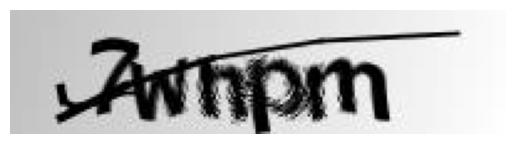

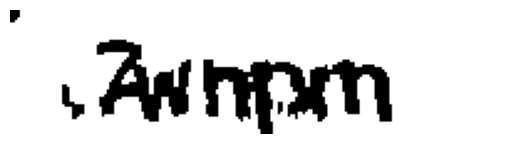

1/1 [==============================] - 0s 46ms/step
7
w
n
p
x
7wnpm.png


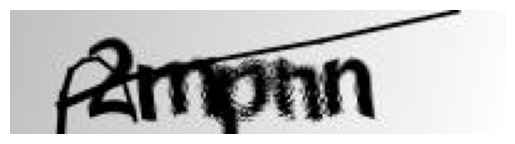

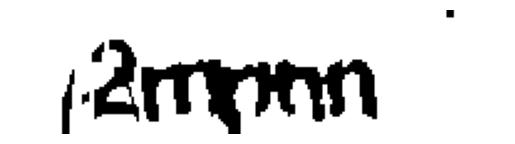

1/1 [==============================] - 0s 47ms/step
2
n
p
g
n
2mpnn.png


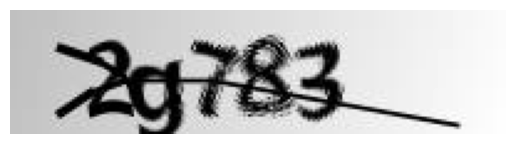

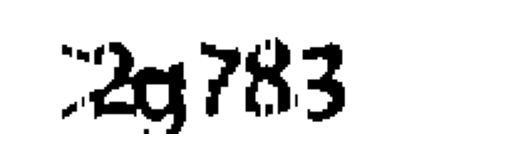

1/1 [==============================] - 0s 38ms/step
2
g
7
8
3
2g783.png


In [201]:
get_demo('Datasets/captcha_images_v2/3g2w6.png')
get_demo('Datasets/captcha_images_v2/7wnpm.png')
get_demo('Datasets/captcha_images_v2/2mpnn.png')
get_demo('Datasets/captcha_images_v2/2g783.png')